<a href="https://colab.research.google.com/github/ekaratnida/Data_Streaming_and_Realtime_Analytics/blob/main/Week13/HashTrick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hash trick

In [ ]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

len(X_train) =  426
len(X_test) =  143
len(y_train) =  426
len(y_test) =  143
scores =  [0.   0.51 0.36 1.   0.99 0.01 0.96 0.77 0.   0.99 0.68 0.01 0.8  0.
 0.98 0.99 0.99 1.   0.98 0.93 0.1  0.99 0.99 0.01 1.   1.   1.   0.
 0.65 0.67 0.8  0.95 0.98 0.98 0.99 0.44 1.   0.99 0.05 0.98 1.   1.
 0.93 0.   1.   1.   0.   0.99 1.   0.98 0.47 1.   0.02 0.99 1.   0.
 0.   0.05 1.   0.98 0.82 0.61 0.36 0.98 0.   0.99 0.06 0.97 0.   0.
 0.86 0.01 0.33 0.   0.99 0.06 1.   1.   0.   1.   1.   0.12 1.   1.
 1.   1.   0.13 1.   0.   0.   0.98 1.   0.   0.99 0.02 0.   0.89 0.01
 0.02 0.43 0.26 1.   1.   0.   0.76 0.14 0.99 0.94 0.98 0.97 0.02 1.
 0.01 0.99 1.   0.98 1.   0.   0.56 1.   0.   1.   0.96 1.   0.98 0.84
 0.05 0.98 0.03 0.   0.88 1.   0.   0.   0.97 1.   1.   0.89 0.   0.99
 0.   0.95 0.18]
y_test =  [0 1 1 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0
 1 0 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 1 0 

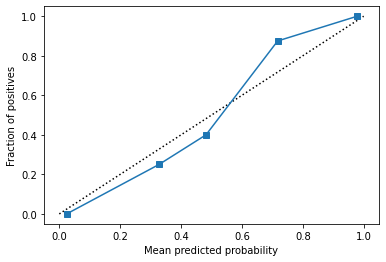

In [ ]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay, calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
#print(data.target)

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, stratify=data.target, random_state=123)

print("len(X_train) = ",len(X_train))
print("len(X_test) = ",len(X_test))
print("len(y_train) = ",len(y_train))
print("len(y_test) = ",len(y_test))

rf = RandomForestClassifier(random_state=345).fit(X_train, y_train)
#test = rf.predict_proba(X_test)
#print("test = ",test.shape)

#predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form. 
#The number of probabilities for each row is equal to the number of categories in target variable (2 in your case).
scores = rf.predict_proba(X_test)[:, 1]
print("scores = ", scores)
#print("X_test = ", X_test)
print("y_test = ", y_test)

# https://scikit-learn.org/stable/modules/calibration.html#calibration
prob_true, prob_pred = calibration_curve(y_test, scores, n_bins=5)
print(prob_true, " , ", prob_pred)

#https://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibrationDisplay.html
disp = CalibrationDisplay(prob_true, prob_pred, scores)
disp.plot()

Useful link <br>
http://rnowling.github.io/data/science/2016/10/20/lr-hashing-recsys.html

In [20]:
import requests
from requests.auth import HTTPBasicAuth
#method = ""
url = "https://testnet.binance.vision/api/v3/exchangeInfo"
h = {'Content-type': 'application/json'}
auth = HTTPBasicAuth("iM4qeCS89S4g1XKrkMCxWjTH4lWCHrQzl8gc30ziGik7qTB9pVMNoL09HCa5DPeq", "V0dk0fjmcoh837HMqcjvXbGYtzBpmRZqnakacEyHbMuQL5kxKYW5mw9GUv7PB7ir")
rsp = requests.request('GET', url, headers=h, auth=auth)
rsp.text

'{"timezone":"UTC","serverTime":1637642343392,"rateLimits":[{"rateLimitType":"REQUEST_WEIGHT","interval":"MINUTE","intervalNum":1,"limit":1200},{"rateLimitType":"ORDERS","interval":"SECOND","intervalNum":10,"limit":50},{"rateLimitType":"ORDERS","interval":"DAY","intervalNum":1,"limit":160000}],"exchangeFilters":[],"symbols":[{"symbol":"BNBBUSD","status":"TRADING","baseAsset":"BNB","baseAssetPrecision":8,"quoteAsset":"BUSD","quotePrecision":8,"quoteAssetPrecision":8,"baseCommissionPrecision":8,"quoteCommissionPrecision":8,"orderTypes":["LIMIT","LIMIT_MAKER","MARKET","STOP_LOSS_LIMIT","TAKE_PROFIT_LIMIT"],"icebergAllowed":true,"ocoAllowed":true,"quoteOrderQtyMarketAllowed":true,"isSpotTradingAllowed":true,"isMarginTradingAllowed":false,"filters":[{"filterType":"PRICE_FILTER","minPrice":"0.01000000","maxPrice":"10000.00000000","tickSize":"0.01000000"},{"filterType":"PERCENT_PRICE","multiplierUp":"5","multiplierDown":"0.2","avgPriceMins":5},{"filterType":"LOT_SIZE","minQty":"0.01000000","m